In [1]:
import cflowpy as cf

In [54]:
physical_problem_cavity = cf.Cavity_flow(8, "top")
system_cavity = cf.System(0, 2, 21, 
                          0, 2, 21, 
                          0.1, 1, 
                          physical_problem_cavity)

In [59]:
u_cavity, v_cavity, p_cavity = system_cavity.solve(0.01, 1)
# print(u_cavity)
# print(v_cavity)
# print(p_cavity)

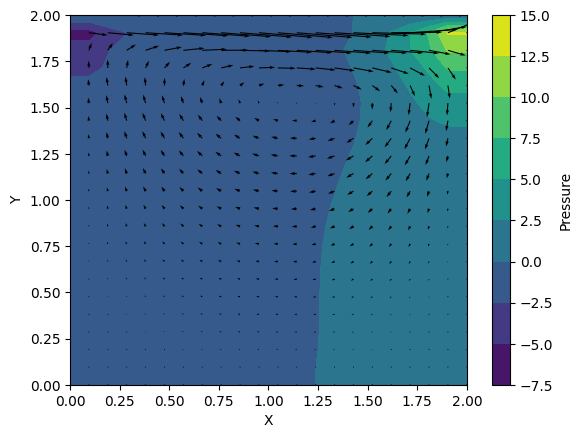

In [60]:
fig = system_cavity.contourfigure(u_cavity, v_cavity, p_cavity)

In [19]:
import numpy as np
# u = np.array([[0,0,0,0,0],
#               [0, 2.04985, 2.04166, 2.03331, 0 ],
#               [0, 0.232511, 0.197593, 0.279434, 0],
#               [0, -2.02985, -2.02166, -2.03331, 0],
#               [8,8,8,8,8]])
u = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
print(u)
val = np.copy(u)
i_para_dim = 0
mat = np.zeros_like(val, dtype=float)
get_dx = 2/4
if i_para_dim == 0:
    mat[:,1:-1] = (val[:,2:None] - val[:,:-2]) / (2. * get_dx)
elif i_para_dim == 1:
    mat[1:-1,:] = (val[2:None,:] - val[:-2,:]) / (2. * get_dy)
print(mat)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[0. 2. 0.]
 [0. 2. 0.]
 [0. 2. 0.]]


In [37]:
xBegin = 0;
xEnd = 5;
nCellsX = 2;
yBegin = 0;
yEnd = 4;
nCellsY = 3;
grid = cf.Grid(xBegin, xEnd,nCellsX,
               yBegin, yEnd, nCellsY)
print(grid.get_x())
print(grid.get_dx())
print(grid.get_dy())
print(grid.get_u().shape)

[[0.  2.5 5. ]
 [0.  2.5 5. ]
 [0.  2.5 5. ]
 [0.  2.5 5. ]]
2.5
1.3333333333333333
(4, 3)


In [53]:
u_ = np.array([[1,4,3,7],
              [10,7,11,13],
              [7,2,9,1]])
v_ = np.array([[1,4,3,7],
              [10,7,11,13],
              [7,2,9,1]])
p_ = np.array([[1,4,3,7],
              [10,7,11,13],
              [7,2,9,1]])
print(u_)
u_diff_x = grid.central_fd(u_, 0, 1)
# u_laplace = grid.laplace(u_)
print("u_diff_x: ", u_diff_x)
# # print("u_laplace: ", u_laplace)
# PP = cf.Cavity_flow(8, "left")
# u_cavity, v_cavity = PP.apply_bcs_velocity(u_, v_)
# p_cavity = PP.apply_bcs_pressure(p_)
# print("cavity u: ", u_cavity)
# print("cavity v: ", v_cavity)
# print("cavity p: ", p_cavity)
# system = cf.System(0, 5, 2,
#                    0, 4, 3,
#                    0.1, 1)
integrator = cf.Integrator()
u_euler = integrator.explicit_Euler(u_, 0.1, u_diff_x)
print("u_euler: ", u_euler)

[[ 1  4  3  7]
 [10  7 11 13]
 [ 7  2  9  1]]
u_diff_x:  [[ 0.   0.4  0.6  0. ]
 [ 0.   0.2  1.2  0. ]
 [ 0.   0.4 -0.2  0. ]]
u_euler:  [[ 1.    4.04  3.06  7.  ]
 [10.    7.02 11.12 13.  ]
 [ 7.    2.04  8.98  1.  ]]
